In [1]:
import chime, warnings
chime.notify_exceptions()
warnings.filterwarnings('ignore')

# Business Understanding - Data Understanding - Data Preparation - EDA

<img src = 'datasc-660x434.png'>

The business problem is understanding the COVID-19.The cumulative count of confirmed, death and recovered cases of COVID-19 from different countries from 22nd January 2020
1. Collecting data https://www.kaggle.com/datasets/imdevskp/corona-virus-report?select=covid_19_clean_complete.csv
- [Note: the downloaded file is in .zip, we need to unzip it then import it as csv]
2. Understanding the data by using the traditional Python data science modules. 

In this notebook, we will walkthrough the pandas library which is used for data wrangling tasks: data assessing, data coding and data cleaning. This is a part of business & data understanding and preparation. [Note: Best practice is always to import os module along with numpy]

- Importing data and dealing with data with different formats: CSV, JSON, TSV, XLSX, TXT, HTML and etc ...
  - pd.read_csv('FILENAME.CSV')
  - pd.read_excel('FILENAME.XLSX',sheet = n) # where n is the sheet number 
- Functions and command to assess the data
  - head(n): Finding n top rows
  - tail(n): Finding n bottom rows
  - sample(n): Finding n sample of data
  - info(): get an overall information about the data attributes/types/missing values
  - shape: finding the shape of data in rows x columns
  - describe(): find statistical measures about your data including: mean, std, Q1,2,3,4 and range, and mode and median.
  - plot(): plotting the data
- Creating a data frame or a data series
  - DataFrame({'COL1_NAME': [Values],'COL2_NAME': [Values]})
  - Series({'INDEX_NAME': [Values]})
- Important functions and cheatsheet check [Cheatsheet](./Pandas_Cheat_Sheet.pdf)
  - lambda function
  - join
  - melt
  - merge
  - concatenate
  and etc ...

## Wrangling Process [Data Understanding & Data Preparation]
- Importing the data and the required modules
- Assessing the data
- Documenting the observations
- Taking action and decision regarding wrangling the data

In [2]:
# Importing required tools
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
# Unzipping the data file since it is a zip file we add attribute compression = 'zip'
df = pd.read_csv('covid_19_clean_complete.csv.zip',compression='zip')

In [4]:
pd.set_option('display.max_rows',None,'display.max_colwidth',None,'display.max_columns',None)

In [5]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [7]:
df[df.duplicated()] # Find duplicates

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region


In [8]:
df.shape

(49068, 10)

In [9]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


Observations:
1. 10 Columns and Province/State has many 35000 null value.
2. The date variable is an object format

Strategy (If province/state not needed):
1. Drop the Province/State
2. Change the date column to datetime

In [10]:
# Dropping the Province/State column
df.drop('Province/State',axis=1,inplace=True)

In [11]:
df['Date'] = pd.to_datetime(df.Date)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49068 non-null  object        
 1   Lat             49068 non-null  float64       
 2   Long            49068 non-null  float64       
 3   Date            49068 non-null  datetime64[ns]
 4   Confirmed       49068 non-null  int64         
 5   Deaths          49068 non-null  int64         
 6   Recovered       49068 non-null  int64         
 7   Active          49068 non-null  int64         
 8   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 3.4+ MB


In [13]:
df.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [14]:
AGG = df.groupby('Country/Region')[['Confirmed', 'Deaths','Recovered', 'Active']].sum()

## Exploratory Data Analysis [EDA]

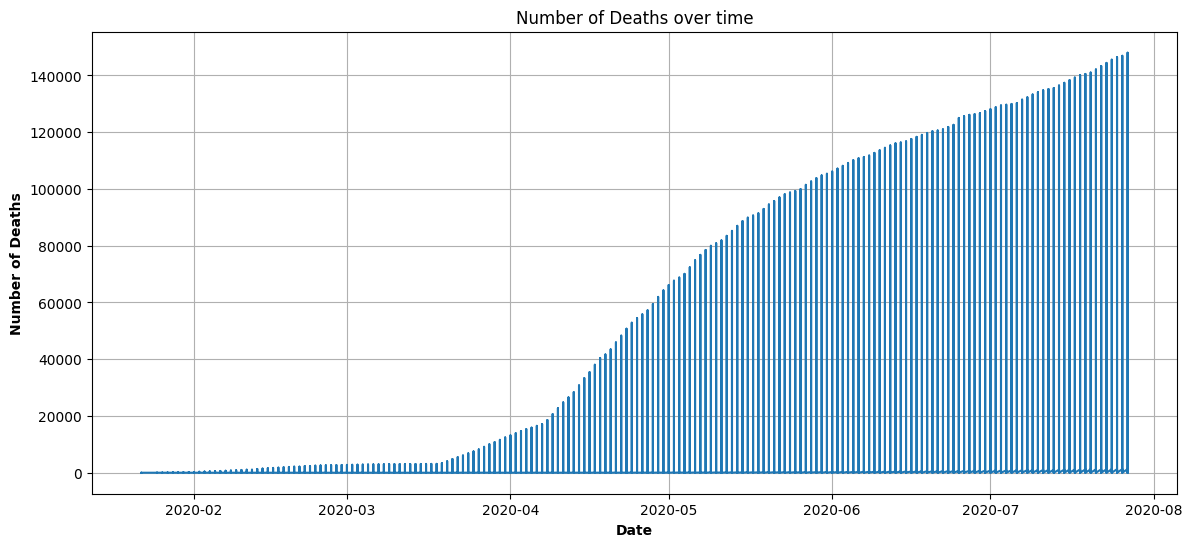

In [15]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'],df['Deaths'])
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Number of Deaths',fontweight='bold')
plt.title('Number of Deaths over time')
plt.grid()

In [16]:
AGG = AGG.sort_values(by='Deaths',ascending=False).iloc[:10]

Q&A:

1. Number of death Top 10
2. Number of death by date


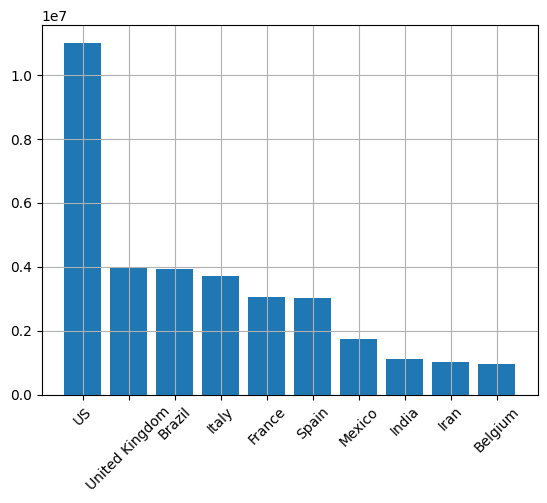

In [17]:
plt.bar(x=AGG.index,height=AGG['Deaths'])
plt.xticks(rotation=45)
plt.grid()

In [18]:
DEATHS_BY_DATE = df.groupby('Date')['Deaths'].sum()
DEATHS_BY_DATE.head()

Date
2020-01-22    17
2020-01-23    18
2020-01-24    26
2020-01-25    42
2020-01-26    56
Name: Deaths, dtype: int64

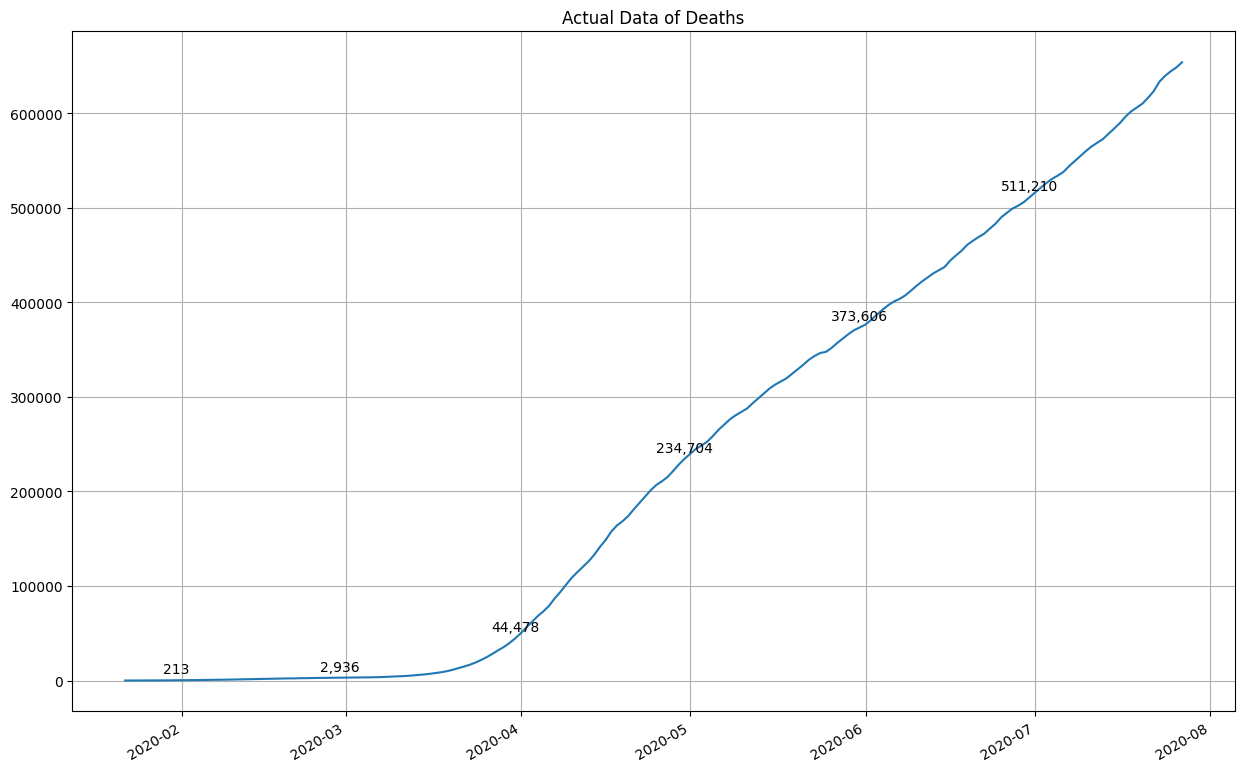

In [19]:
# Simulating the plot with the user's data
fig, ax = plt.subplots(figsize=(15, 10))
# Plotting the data
ax.plot_date(DEATHS_BY_DATE.index, DEATHS_BY_DATE.values, linestyle='solid', marker=None)
# Annotate each point with the value using the last day of each month
for date in DEATHS_BY_DATE.index:
    if date.is_month_end:
        ax.annotate(f'{DEATHS_BY_DATE[date]:,}', 
                    (mdates.date2num(date), DEATHS_BY_DATE[date]), 
                    xytext=(0,5), 
                    textcoords='offset points', 
                    ha='center')
# Set grid on
ax.grid(True)
plt.title('Actual Data of Deaths')
# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

plt.show()


# Data Modelling [Machine Learning Model]

<img src = basic_modelling1.png>

## Machine Learning Model

### Linear Regression: Futuristic Question 1: How many deaths expected in the next week?

In this section, we ask ourselves a question in the future and can be answered through the use of machine learning linear regression.
The question is:
- How many deaths expected in the next week?

In [20]:
DEATHS_BY_DATE.shape

(188,)

In [21]:
# Split the data into training and testing sets, excluding the last 7 days for testing
train_data = DEATHS_BY_DATE[:-7]
test_data = DEATHS_BY_DATE[-7:]
X_train = train_data.index.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y_train = train_data.values
X_test = test_data.index.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y_test = test_data.values
# Create and fit the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)
# Predict on the test set
predictions = model.predict(X_test)
# Combine actual and predicted values into a DataFrame for comparison
test_dates = test_data.index
predicted_vs_actual = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions.round(0)
}, index=test_dates)
predicted_vs_actual

,Actual,Predicted
Date,,
2020-07-21,616557,562359.0
2020-07-22,623540,566176.0
2020-07-23,633506,569992.0
2020-07-24,639650,573809.0
2020-07-25,644517,577625.0
2020-07-26,648621,581442.0
2020-07-27,654036,585258.0


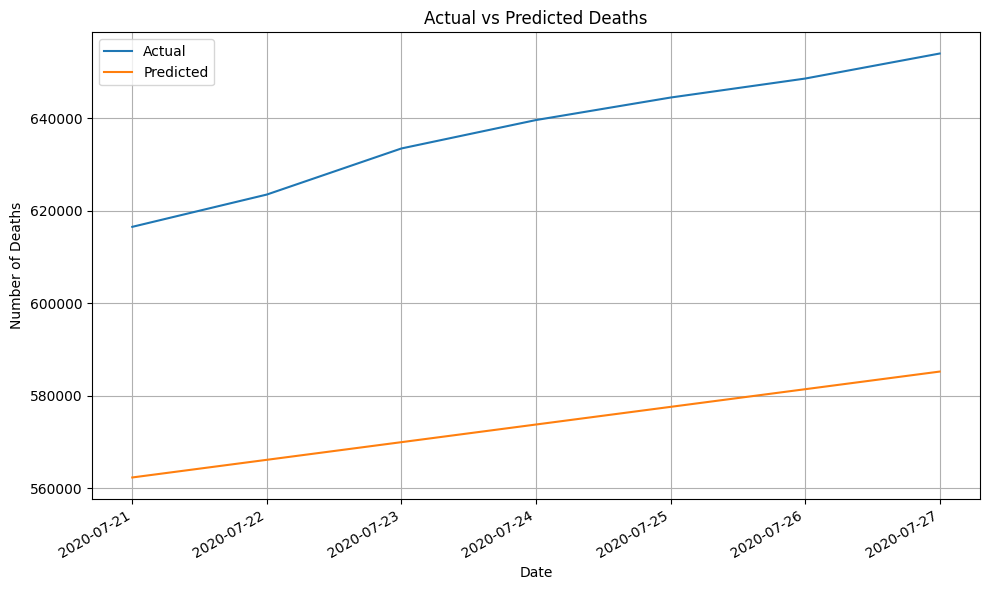

In [22]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
# Plot actual values
plt.plot_date(test_data.index, y_test, linestyle='solid', marker=None, label='Actual')
# Plot predicted values
plt.plot_date(test_data.index, predictions.round(0), linestyle='solid', marker=None, label='Predicted')
# Adding the legend
plt.legend()
# Adding a grid
plt.grid(True)
# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()
# Set title and labels
plt.title('Actual vs Predicted Deaths')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
# Show plot with tight layout
plt.tight_layout()
plt.show()


In [23]:
model.coef_,model.intercept_

(array([3816.55779653]), -2814633718.6689014)

##### Findings
- In my opinion, if we are going to use the Linear Regression, we can choose to start from a point that looks like a line start. It may be after April.

#### Retrain the model

In [24]:
DEATHS_BY_DATE = DEATHS_BY_DATE[DEATHS_BY_DATE.index>='2020-04-01'] #Data after April 2020

In [25]:
# Split the data into training and testing sets, excluding the last 7 days for testing
train_data = DEATHS_BY_DATE[:-7]
test_data = DEATHS_BY_DATE[-7:]
X_train = train_data.index.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y_train = train_data.values
X_test = test_data.index.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y_test = test_data.values
# Create and fit the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)
# Predict on the test set
predictions = model.predict(X_test)
# Combine actual and predicted values into a DataFrame for comparison
test_dates = test_data.index
predicted_vs_actual = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions.round(0)
}, index=test_dates)
predicted_vs_actual

,Actual,Predicted
Date,,
2020-07-21,616557,618630.0
2020-07-22,623540,623487.0
2020-07-23,633506,628343.0
2020-07-24,639650,633200.0
2020-07-25,644517,638057.0
2020-07-26,648621,642913.0
2020-07-27,654036,647770.0


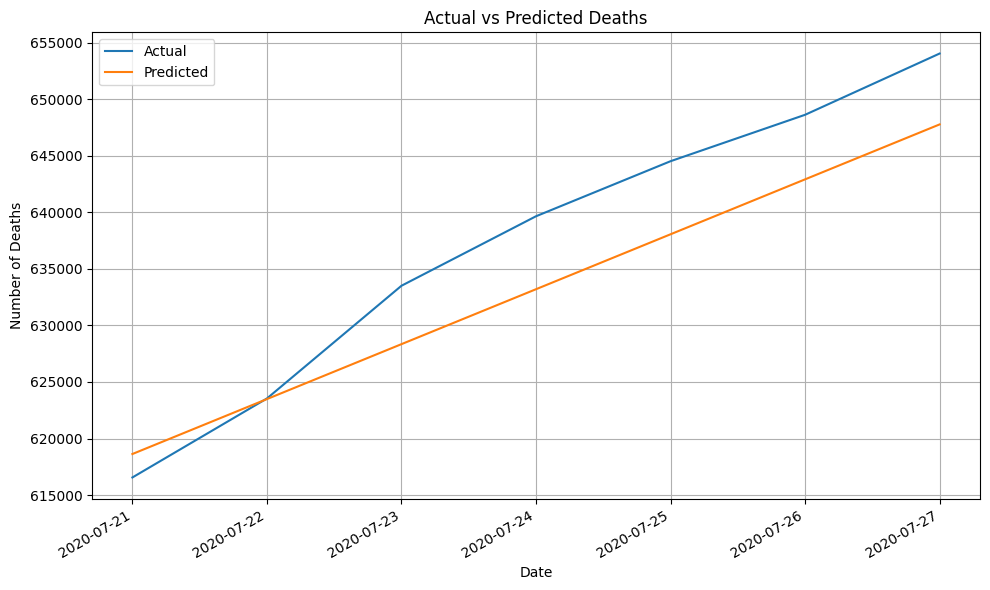

In [26]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
# Plot actual values
plt.plot_date(test_data.index, y_test, linestyle='solid', marker=None, label='Actual')
# Plot predicted values
plt.plot_date(test_data.index, predictions.round(0), linestyle='solid', marker=None, label='Predicted')
# Adding the legend
plt.legend()
# Adding a grid
plt.grid(True)
# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()
# Set title and labels
plt.title('Actual vs Predicted Deaths')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
# Show plot with tight layout
plt.tight_layout()
plt.show()

- Better accuracy achieved!

In [27]:
model.coef_,model.intercept_

(array([4856.63082661]), -3581763396.7528286)

### Linear Regression: Futuristic Question 2: Can we infere about deaths using other features rather than date? Example if I have the number of active cases, can I infere about deaths?

- In this section, we learn how to find correlation between features to be then used in linear regression modelling.
- The groupby is used to find the sum of Deaths,Active,Recovered,Confirmed

In [28]:
AGG = df.groupby('Date',as_index=False)[['Deaths','Active','Recovered','Confirmed']].sum()

In [29]:
AGG.corr()

,Date,Deaths,Active,Recovered,Confirmed
Date,1.000000,0.971103,0.970546,0.884856,0.934989
Deaths,0.971103,1.000000,0.996879,0.936940,0.975981
Active,0.970546,0.996879,1.000000,0.953981,0.986543
Recovered,0.884856,0.936940,0.953981,1.000000,0.990165
Confirmed,0.934989,0.975981,0.986543,0.990165,1.000000


## Correlation Exploration

- Correlation means the relation between one feature and another. It measures how strong the relationship between two variables 

<img src = 'corr.png'>

<Axes: >

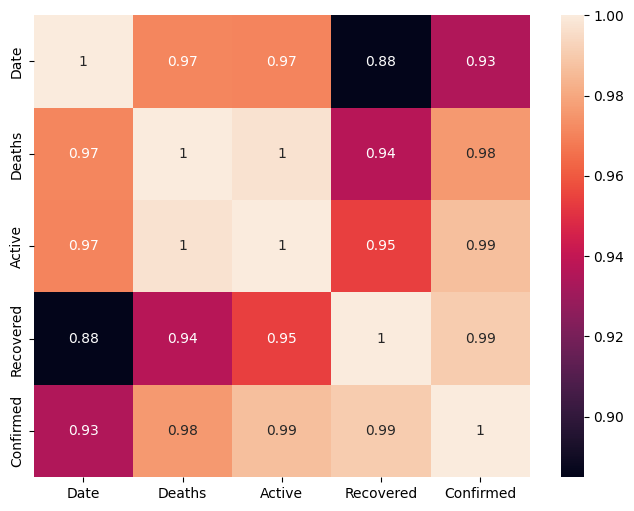

In [30]:
plt.figure(figsize=(8,6))
sb.heatmap(AGG.corr(),annot=True)

In [31]:
AGG['Date'] = AGG['Date'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)

In [32]:
AGG.head(1)

,Date,Deaths,Active,Recovered,Confirmed
0,737446,17,510,28,555


In [33]:
# Split the data into training and testing sets, excluding the last 7 days for testing
train_data = AGG[:-7]
test_data = AGG[-7:]
X_train = train_data.values[:,[0,2,3,4]]
y_train = train_data.values[:,1] #deaths
X_test = test_data.values[:,[0,2,3,4]]
y_test = test_data.values[:,1]
# Create and fit the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)
# Predict on the test set
predictions = model.predict(X_test)
# Combine actual and predicted values into a DataFrame for comparison
test_dates = test_data.index
predicted_vs_actual = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions.round(0)
}, index=test_dates)
predicted_vs_actual

,Actual,Predicted
181,616557,616557.0
182,623540,623540.0
183,633506,633506.0
184,639650,639650.0
185,644517,644517.0
186,648621,648621.0
187,654036,654036.0


In [34]:
model.coef_,model.intercept_

(array([-4.19404685e-11, -1.00000000e+00, -1.00000000e+00,  1.00000000e+00]),
 3.0929979402571917e-05)

## Lab Work: Build your own model to answer the following question: - How many recovery are expected to occur in the next 10 days? 
- Note: You are allowed to use multiple features as input, you can use the correlation matrix to find relation between features

In [35]:
# Split the data into training and testing sets, excluding the last 7 days for testing
train_data = AGG[:-10]
test_data = AGG[-10:]
X_train = train_data.values[:,[0,1,2,4]]
y_train = train_data.values[:,3] #deaths
X_test = test_data.values[:,[0,1,2,4]]
y_test = test_data.values[:,3]
# Create and fit the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)
# Predict on the test set
predictions = model.predict(X_test)
# Combine actual and predicted values into a DataFrame for comparison
test_dates = test_data.index
predicted_vs_actual = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions.round(0)
}, index=test_dates)
predicted_vs_actual

,Actual,Predicted
178,7944550,7944550.0
179,8032235,8032235.0
180,8190777,8190777.0
181,8364986,8364986.0
182,8541255,8541255.0
183,8710969,8710969.0
184,8939705,8939705.0
185,9158743,9158743.0
186,9293464,9293464.0
187,9468087,9468087.0


# Logistic Regression

Logistic Regression is a statistical and machine learning technique used for classification tasks, particularly binary classification. It is used to predict the probability of a target variable (dependent variable) based on one or more predictor variables (independent variables). Despite its name, logistic regression is used for classification rather than regression tasks.

### Input:
- **Predictor Variables (Features)**: The input to logistic regression can be one or more predictor variables (X) that can be either continuous or categorical. These variables are used to predict the outcome of the target variable.
- **Target Variable (Label)**: The target variable (Y) in logistic regression is binary, meaning it can take on only two possible outcomes. For example, "1" for success and "0" for failure, or "yes" for presence and "no" for absence of a condition.

### Output:
- **Probability**: The output of logistic regression is a probability that ranges between 0 and 1. This probability represents the likelihood of the target variable being in one of the two classes (e.g., 1 or 0, yes or no). Based on a threshold (commonly 0.5), the model assigns each observation to one of the two classes.

### How It Works:
1. **Logistic Function (Sigmoid Function)**: Logistic regression uses the logistic (sigmoid) function to model the probability that each input belongs to a particular category. The sigmoid function outputs a value between 0 and 1, which is interpreted as a probability. The function is defined as:
$$ P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \dots + \beta_kX_k)}} $$

- **Where:**

    - **P(Y=1)**: is the probability that the target variable Y is in class 1.
    - **e**: is the base of the natural logarithm.
    - **β0, β1, ..., βk**: are the coefficients of the model.
    - **X1, ..., Xk**: are the predictor variables.

2. **Estimating Coefficients**: The coefficients (\(\beta\)) of the logistic regression model are estimated using maximum likelihood estimation (MLE). This method finds the set of coefficients that maximizes the likelihood of the observed set of responses with the given set of predictor variables.

3. **Decision Boundary**: Logistic regression models the decision boundary between the classes. The decision boundary can be linear or nonlinear, depending on the logistic regression variant used (e.g., linear logistic regression or logistic regression with polynomial features).

4. **Classification and Probability Estimation**: Once the model is trained (i.e., the coefficients are estimated), it can be used to predict the probability of new observations belonging to each class. If the predicted probability is greater than or equal to 0.5, the observation is classified into class 1; otherwise, it is classified into class 0.

Logistic regression is widely used in various fields such as medicine, finance, and social sciences for binary classification problems because of its simplicity, interpretability, and effectiveness in situations where the relationship between the predictor variables and the log odds of the outcome is approximately linear.

### Dependencies

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Data Wrangling [Data Preparation]


**Covid-19 Classification Data**

Contains a vast number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 different features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

Dataset Source: https://www.kaggle.com/datasets/meirnizri/covid19-dataset?resource=download

**Attributes** :
 
content
The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

- sex: 1 for female and 2 for male.
- age: of the patient.
- classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [20]:
data = pd.read_csv('classification_covid.zip',compression='zip')
pd.set_option('display.max_columns',None,'display.max_rows',None,'display.max_colwidth',None)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [10]:
data.sample(25)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
262401,2,4,2,1,9999-99-99,97,2,21,97,2,2,2,2,2,2,2,2,2,2,7,97
927772,1,12,1,1,9999-99-99,97,2,32,2,2,2,2,2,2,98,2,2,2,2,7,97
65999,1,4,2,2,9999-99-99,2,2,50,97,2,2,2,2,2,2,2,2,2,2,3,2
538475,2,12,1,1,9999-99-99,97,2,25,1,2,2,2,2,2,2,2,2,2,2,3,97
717126,1,12,1,1,9999-99-99,97,2,31,2,1,2,2,2,2,2,2,2,2,2,6,97
774321,2,12,2,1,9999-99-99,97,2,44,97,2,2,2,2,2,2,2,2,2,2,7,97
948796,2,12,1,1,9999-99-99,97,2,41,2,2,2,2,2,2,2,2,2,2,2,7,97
672174,2,12,1,1,9999-99-99,97,2,60,2,1,2,2,2,2,2,2,2,2,2,5,97
308172,2,4,2,1,9999-99-99,97,2,38,97,2,2,2,2,2,2,2,2,2,2,7,97
681224,1,12,1,1,9999-99-99,97,99,13,2,2,2,2,2,2,2,2,2,2,2,6,97


**Handling Missing Data**:
- First, counting the proportion of missing data (the ones having 97,98,99 codes)
- Second, look by manual inspection for the date died
- Third, choose which feature to be dropped then.

In [21]:
for column in data.columns:    
    # Count the occurrences of special codes (97, 98, 99) in these columns
    special_code_counts = {column: data[column].value_counts().loc[lambda x: x.index.isin([97, 98, 99,'9999-99-99'])]\
        .sum() for column in data.columns}
    # Total count for perspective
    total_counts = {column: data[column].count() for column in data.columns}
    # Find total special code
    special_code_proportions = {column: special_code_counts[column] / total_counts[column] for column in data.columns}
special_code_proportions


{'USMER': 0.0,
 'MEDICAL_UNIT': 0.0,
 'SEX': 0.0,
 'PATIENT_TYPE': 0.0,
 'DATE_DIED': 0.9266223207686622,
 'INTUBED': 0.816221061917364,
 'PNEUMONIA': 0.015261664640106812,
 'AGE': 0.0003290179529361276,
 'PREGNANT': 0.5028395679851226,
 'DIABETES': 0.0031833679040602723,
 'COPD': 0.002863886703383163,
 'ASTHMA': 0.002840998497961519,
 'INMSUPR': 0.0032463104689697923,
 'HIPERTENSION': 0.0029602079011992466,
 'OTHER_DISEASE': 0.0048112915146746775,
 'CARDIOVASCULAR': 0.0029335049948739957,
 'OBESITY': 0.0028915432849343156,
 'RENAL_CHRONIC': 0.0028667477290608683,
 'TOBACCO': 0.0030708342274038576,
 'CLASIFFICATION_FINAL': 0.0,
 'ICU': 0.8163765109791861}

- Next the optimum approach is to exclude the features with high missing values.
- To perform this, it is better to do it dynamically (removing based on a filter not by manual inspection)
- For me I have chosen the features with high 0.2 to be dropped (along side with the Y which is the target column) 

In [22]:
dynamic_filtered_features = {k: v for k, v in special_code_proportions.items() if v <= 0.1 and k not in ['CLASIFFICATION_FINAL']}
dynamic_filtered_features

{'USMER': 0.0,
 'MEDICAL_UNIT': 0.0,
 'SEX': 0.0,
 'PATIENT_TYPE': 0.0,
 'PNEUMONIA': 0.015261664640106812,
 'AGE': 0.0003290179529361276,
 'DIABETES': 0.0031833679040602723,
 'COPD': 0.002863886703383163,
 'ASTHMA': 0.002840998497961519,
 'INMSUPR': 0.0032463104689697923,
 'HIPERTENSION': 0.0029602079011992466,
 'OTHER_DISEASE': 0.0048112915146746775,
 'CARDIOVASCULAR': 0.0029335049948739957,
 'OBESITY': 0.0028915432849343156,
 'RENAL_CHRONIC': 0.0028667477290608683,
 'TOBACCO': 0.0030708342274038576}

- The Classification final should be encoded to either 0 or 1 by checking the description you will find that:
    - People with 0 to 3 are diagnosed as covid-19
    - People with 4 or more are not

In [23]:
data['CLASIFFICATION_FINAL'].value_counts()

CLASIFFICATION_FINAL
7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: count, dtype: int64

In [24]:
data['CLASIFFICATION_FINAL'] = data['CLASIFFICATION_FINAL'].map({1: 'POS', 2: 'POS', 3: 'POS', 4:'NEG', 5:'NEG', 6:'NEG', 7:'NEG'})

In [27]:
# Update feature selection based on the analysis above
updated_features = list(dynamic_filtered_features.keys())
mask = data[updated_features] # Select only the updated features from the dataset
mask['CLASIFFICATION_FINAL'] = data['CLASIFFICATION_FINAL'] # Add the target column back
for column in mask.columns:
    if column != 'CLASIFFICATION_FINAL':
        mask = mask[(mask[column]<96)] # Excluding the 97,98,99 missing data from data
mask.shape

C:\Users\Metwalli\AppData\Local\Temp\ipykernel_5892\3399123075.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask['CLASIFFICATION_FINAL'] = data['CLASIFFICATION_FINAL'] # Add the target column back


(1024460, 17)

### Data Modelling

In [28]:
# Update feature selection based on the analysis above
X_updated = mask.drop('CLASIFFICATION_FINAL',axis=1)
Y = mask['CLASIFFICATION_FINAL']
# Split the updated dataset into training and testing sets
X_train_updated, X_test_updated, Y_train, Y_test = train_test_split(X_updated, Y, test_size=0.2, random_state=42)

In [29]:
# Initialize and train the logistic regression model on the updated dataset
model_updated = LogisticRegression(n_jobs=-1)
model_updated.fit(X_train_updated, Y_train)

# Updated predictions
Y_pred_updated = model_updated.predict(X_test_updated)
# Evaluate the updated model
accuracy_updated = accuracy_score(Y_test, Y_pred_updated)
report_updated = classification_report(y_true=Y_test, y_pred=Y_pred_updated) # Actual Y and the predicted (Y_hat)

print(report_updated)

a:\anaconda3_23.7.3\envs\mitocluster\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         NEG       0.66      0.91      0.77    127239
         POS       0.62      0.25      0.35     77653

    accuracy                           0.66    204892
   macro avg       0.64      0.58      0.56    204892
weighted avg       0.65      0.66      0.61    204892



- The model just achieved 66% accuracy due to one or more of the following reasons:
    - The data balance can be enhanced by balancing both positive and negative classes. 
    - Some data used in this classification may be irrelevant. (Will discover later in Regularization)
    - The sample data are not ideal since we do not have an equiprobable number of output.
    - The logistic regression may not be the best practice since it has the following disadvantages:
        - Logistic regression only works well for cases where the dataset is linearly separable because:
            - Logistic regression assumes linearity between the predicted (dependent) variable and the predictor (independent) variables

# Evaluation of the classification model: [CONFUSION MATRIX] 

A Confusion Matrix is a performance measurement tool for machine learning classification. It is a table with two dimensions ("Actual" and "Predicted"), and it allows us to visualize the performance of an algorithm. Here's a breakdown of its components:

<img src='conf_matrix.png' width='400' height='350' style='display: block; margin: auto;'>

## Structure
- **True Positives (TP)**: The cases in which the actual class of the data point was 1 (True) and the predicted is also 1 (True).
- **True Negatives (TN)**: The cases in which the actual class of the data point was 0 (False) and the predicted is also 0 (False).
- **False Positives (FP)**: The cases in which the actual class of the data point was 0 (False) and the predicted is 1 (True), also known as a "Type I error". The model incorrectly predicted the positive class.
- **False Negatives (FN)**: The cases in which the actual class of the data point was 1 (True) and the predicted is 0 (False), also known as a "Type II error". The model incorrectly predicted the negative class.

## Metrics Derived
- **Accuracy**: Overall, how often is the classifier correct? `(TP + TN) / (TP + TN + FP + FN)`
- **Precision** (or Positive Predictive Value): When it predicts yes, how often is it correct? `TP / (TP + FP)`
- **Recall** (or Sensitivity or True Positive Rate): How often it predicts yes, when it's actually yes? `TP / (TP + FN)`
- **F1 Score**: A weighted average of Precision and Recall. `2 * (Precision * Recall) / (Precision + Recall)`
- **Specificity** (or True Negative Rate): How often it predicts no, when it's actually no? `TN / (TN + FP)`
- **False Positive Rate**: When it's actually no, how often does it predict yes? `FP / (FP + TN)`
- **Negative Predictive Value**: When it predicts no, how often is it correct? `TN / (TN + FN)`
- **False Discovery Rate**: When it predicts yes, how often is it wrong? `FP / (FP + TP)`

## Importance
Understanding these metrics and the structure of a confusion matrix is crucial for interpreting the performance of classification models, allowing for the identification of areas for improvement, and balancing precision and recall according to the business requirements.

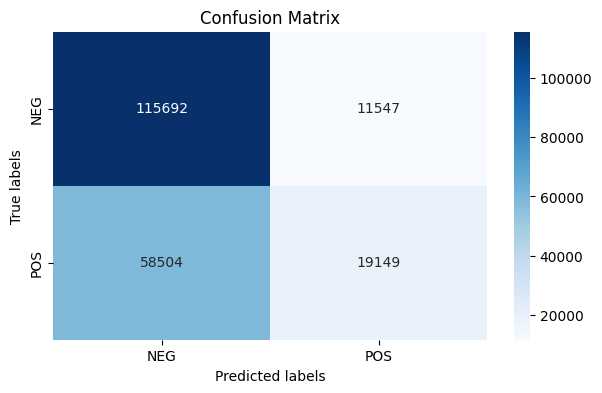

In [38]:
# Generating the confusion matrix
LABELS = ['NEG','POS']
conf_matrix = confusion_matrix(Y_test, Y_pred_updated, labels=LABELS)
# Plotting the confusion matrix
plt.figure(figsize=(7,4))
sb.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# K-Nearest Neighbor (KNN)

K-Nearest Neighbors (KNN) is a simple, yet powerful machine learning algorithm used for both classification and regression tasks. Unlike logistic regression, which is a predictive modeling technique based on the assumption of a mathematical relationship between input variables and the probability of the target variable, KNN works by finding the most similar historical data points to the new data point and predicting the outcome based on the outcomes of these neighbors.

**Input:**
- Predictor Variables (Features): KNN uses predictor variables (X) similar to logistic regression. These variables describe the characteristics of the data points. The algorithm uses these features to find the nearest neighbors of a new data point.
- Target Variable (Label): The target variable (Y) in KNN can be either categorical for classification tasks or continuous for regression tasks. For classification, the algorithm assigns a class to the new data point based on the majority vote of its nearest neighbors.

**Output:**
- Class Membership (for classification): In classification tasks, KNN outputs the class with the majority vote among the K nearest neighbors of the new data point.
- Value Prediction (for regression): In regression tasks, KNN predicts the value for the new data point based on the average (or another aggregate measure) of the values of its K nearest neighbors.

**How It Works:**
- Choosing K: The first step in KNN is to choose the number of neighbors (K). This is a crucial parameter that influences the performance of the algorithm. A small value of K can make the algorithm sensitive to noise in the data, while a large value makes it computationally expensive and may lead to underfitting.
- Distance Measure: To find the nearest neighbors, KNN calculates the distance between data points using a distance measure such as Euclidean, Manhattan, or Minkowski distance. The choice of distance measure can affect the performance of the algorithm.
- Finding Nearest Neighbors: For each new data point, the algorithm searches the training dataset to find the K nearest neighbors based on the distance measure.

- Majority Vote or Averaging:

    - Classification: For classification tasks, KNN assigns the class based on the majority class among the K nearest neighbors. Ties can be broken randomly or by reducing K until a clear majority is found.
    - Regression: For regression tasks, KNN predicts the value by averaging (or taking another aggregate measure) the values of the K nearest neighbors.
- Prediction: The new data point is assigned the computed class (for classification) or value (for regression) based on its nearest neighbors.

KNN is widely appreciated for its simplicity, ease of understanding, and effectiveness in many scenarios. However, it can be computationally expensive as it requires storing the entire dataset and calculating distances between data points for each prediction. Additionally, the performance of KNN can be significantly impacted by the choice of K and the distance measure used.

## Continue Preprocessing before applying KNN

- First let's do better data preprocessing
    - Balancing data by making the number of records positive or negative are equal on 'CLASSIFFICATION_FINAL'
        - The number of positive are 388632 having Covid and the number of negative are 635828
        - We can take sample of 300000 from both dataset to make them equal.
    - Removing irrelevant data
        - I found that 
            - USMER and MEDICAL_UNIT are irrelevant to classification task so we will remove it. 
        - We can use techniques such as feature_importance to find out which features are important 